In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [ ]:
big_mart_data= pd.read_csv('/content/Train.csv')

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data.shape

(8523, 12)

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
big_mart_data.dropna(inplace=True)

In [ ]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

<ipython-input-45-b7810d1f3bfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

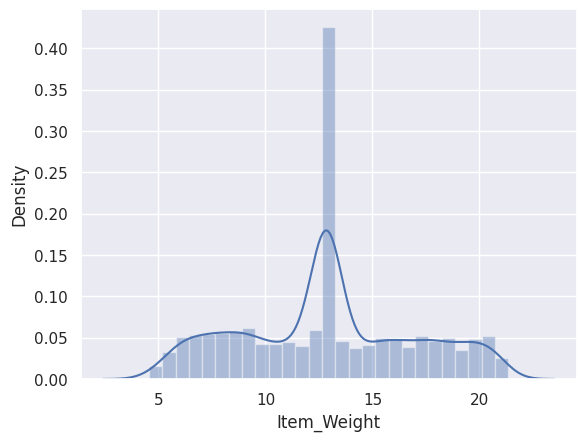

In [ ]:
sns.distplot(big_mart_data['Item_Weight'])

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3641
Regular,2076
LF,233
reg,82
low fat,81


In [ ]:
big_mart_data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat': 'low fat', 'reg': 'Regular' }}, inplace=True)

In [ ]:
encoder= LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [ ]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

In [ ]:
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

In [ ]:
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

In [ ]:
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

In [ ]:
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,443.4228
2,661,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,2097.2700
4,1294,8.930,0,0.000000,9,53.8614,0,1987,0,2,1,994.7052
5,757,10.395,1,0.000000,0,51.4008,1,2009,1,2,2,556.6088


In [ ]:
X= big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y=big_mart_data['Item_Outlet_Sales']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=2, test_size=0.2)

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train= metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
r2_train

0.9000406941822165

In [ ]:
test_data_prediction= regressor.predict(X_test)

In [ ]:
r2_test= metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
r2_test

0.4803873903655942